Problem Set 4

Problem 1 - Shifting an Array

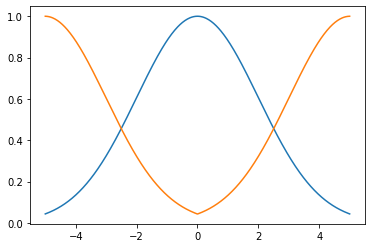

In [69]:
from matplotlib import pyplot as plt
import numpy as np 
import scipy

def delta(n):
    delta=np.zeros(len(n))
    for i in range(len(n)):
        if n[i]==0:
            delta[i]=1
        else:
            delta[i]=0
    return delta

def shift(array,shift):
    f=array
    N=array.size
    kvec=np.arange(N)
    ft=np.fft.rfft(f)
    #Convolve with delta function
    g=delta(kvec-shift)
    gft=np.fft.rfft(g)
    shiftedf=np.fft.irfft(ft*gft)
    return shiftedf

x=np.linspace(-5,5,500)
array=np.exp(-0.5*x**2/(2)**2)

shifted=shift(array,len(array)/2)

plt.plot(x,array)
plt.plot(x,shifted)



The shifted function is not perfectly smooth in the middle because of the finite edges in the fourier transforms.

Problems 2 and 3 - Correlation Function of Two Arrays

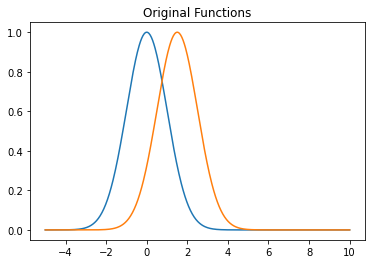

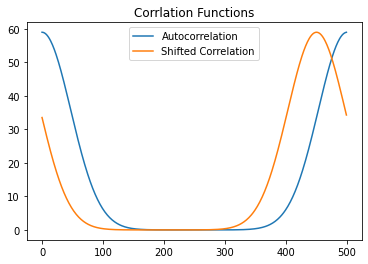

In [239]:
def correlation(array1,array2):
    #Problem 2
    f=array1
    g=array2
    corr=corr=np.fft.ifft(np.fft.fft(f)*np.conjugate(np.fft.fft(g)))
    return corr

def shiftedcorrelation(array,n):
    #Problem 3
    f=array
    g=shift(array,n)
    corr=correlation(f,g)
    return corr

x=np.linspace(-5,10,500)
array1=np.exp(-1.0*x**2/2)

corr1=correlation(array1,array1) #Problem 2
corr2=shiftedcorrelation(array1,50) #Problem 3

plt.figure(1)
plt.title("Original Functions")
plt.plot(x,array1)
plt.plot(x,array2)

plt.figure(2)
plt.title("Corrlation Functions")
plt.plot(corr1,label="Autocorrelation") #Problem 2
plt.plot(corr2,label="Shifted Correlation") #Problem 3
plt.legend()
plt.show()


As the second function is shifted to the right or left, the correlation function is shifted in the opposite direction. This makes sense because the peak of the correlation function corresponds to how much the second function needs to be moved to match up with the first. So, if the original function is shifted 50 points to the right, the maximum correlation occurs at 50 points to the left. This also explains why the autocorrelation function peaks at 0. 

Problem 4 - Zero Padding

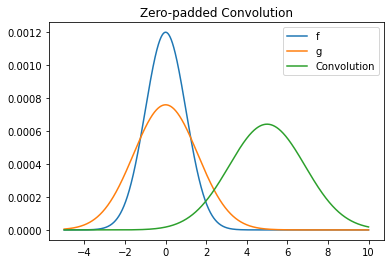

In [74]:
def paddedConv(f,g):
    fpad=np.pad(f,[0,len(f)])
    gpad=np.pad(g,[0,len(g)])
    conv=np.real(np.fft.irfft(np.fft.rfft(gpad)*np.fft.rfft(fpad)))
    conv=conv[:len(f)] #only take the piece of the convolution that matches up with original data
    return conv

x=np.linspace(-5,10,5000)
f=5.0*np.exp(-1.0*x**2/2.0)
g=2.0*np.exp(-1.0*x**2/5.0)
#normalize f and g so I can plot convolution on same plot easily. 
fnorm=f/f.sum()
gnorm=g/g.sum()

conn=paddedConv(fnorm,gnorm)

plt.figure(3)
plt.title("Zero-padded Convolution")
plt.plot(x,fnorm,label="f")
plt.plot(x,gnorm,label='g')
plt.plot(x,conn,label='Convolution')
plt.legend()


Problem 5

Part A 

![alt text](P4_5a.png)

Part B

![alt text](P4_5b.png)

Part C 

![alt text](P4_5c.png)

The error between FFT and the analytic estimate is, 3.66383416377105e-13 .


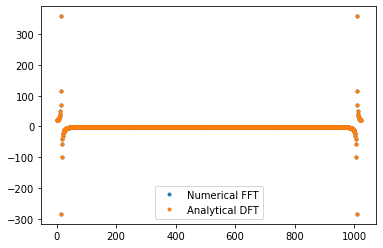

In [262]:
#Plotting Analytic Estimate
def dft_anal(N,k0):
    kvec=np.arange(N)
    num1=1-np.exp(-2J*np.pi*(kvec-k0))
    denom1=1-np.exp((-2J*np.pi*(kvec-k0))/N)
    num2=1-np.exp(-2J*np.pi*(kvec+k0))
    denom2=1-np.exp((-2J*np.pi*(kvec+k0))/N)
    dft=-0.5*1J*(num1/denom1-num2/denom2)
    return dft

N=1024
x=np.arange(N)
k0=15.45

realfun=np.sin(2*np.pi*x*k0/N)
ft_comp=np.fft.fft(realfun)
ft_anal=dft_anal(N,k0)

plt.figure(4)
plt.plot(ft_comp,'.',label="Numerical FFT")
plt.plot(ft_anal,'.',label="Analytical DFT")
plt.legend()

error=np.mean(np.abs(ft_real-ft_anal))
print('The error between FFT and the analytic estimate is,',error,'.')


The Fourier transform of the non-integer sine wave is close to a delta function, but has a finite width that differentiates it from a true delta function. 

Part D - Windowing

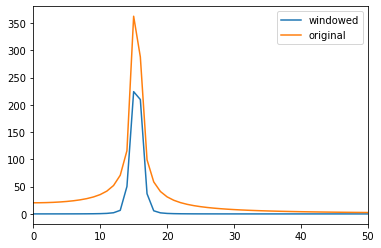

In [263]:
window=0.5-0.5*np.cos(2*np.pi*x/N)

newfun=realfun*window
plt.figure(5)
plt.plot(np.abs(np.fft.fft(newfun)),label="windowed")
plt.plot(np.abs(np.fft.fft(realfun)),label='original')
plt.xlim(0,50) #zoom in on one peak
plt.legend()

The width of the peak drops dramatically when a window function is added. 

Part E 

![alt text](P4_5e.png)